# Data Visualisation with Matplotlib

## Introduction to Matplotlib

#### Learning Objectives
- What is Matplotlib and why is it so useful?
- Understand the structure of the matplot lib object, and how to use that to customize graphics
- How to do basic plotting and visualisations (via Pandas)
    - boxplots, barcharts, line plots, scatterplots, histograms
- Learn about customising various aesthetics
    - axes, labels, colour, legends, subplots
- Challenge: try to make the most interesting plot with the most customisations!

In [1]:
# Importing Numpy, Matplotlib and Pandas (with nicknames!) so that we can use them

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Making sure random number generators are consistent across the group
np.random.seed(444)

In [2]:
#show all our plots in the notebook
%matplotlib inline

#### But First, a quick review of the 2 classic Python Storage Structures
- Lists
- and dictionaries

In [3]:
example_list = [0,1,2,3,'4',['f','i','v','e']]

#lets slice the list using integer indices
print(example_list[0:4], 'Hey where is "4"?')



[0, 1, 2, 3] Hey where is "4"?


### Dictionaries

In [4]:
example_dict = {'listname':'example_list'}

#dictionaries are just lists where we name our indices
print(example_dict['listname'])

#and its hella easy to add new data to it
example_dict['data'] = example_list

print(example_dict.keys(), 'A method to give us all of the keys to our dictionary')

# calling the key gives us the value, a list in this case
example_dict['data']

example_list
dict_keys(['listname', 'data']) A method to give us all of the keys to our dictionary


[0, 1, 2, 3, '4', ['f', 'i', 'v', 'e']]

### Also, remember that Numpy arrays are just lists we can do maths with, but they can only store once kind of data (i.e. only integers)

In [5]:
a = np.array([5,1,6])
b = np.array([7,8,9])
a+b

array([12,  9, 15])

### One more thing, Methods - the special functions that our objects carry around with them

syntax:
```python
object_name.method_name(extra arguments)
```

In [6]:
test_list = ['p','l','o','t']
print(test_list, ' before the sort')
test_list.sort()
print(test_list, "see after the sort it has changed")

['p', 'l', 'o', 't']  before the sort
['l', 'o', 'p', 't'] see after the sort it has changed


### So what is Matplotlib, and why do we use it?

Matpotlib is one of the oldest, largest, and most widely used Python plotting package in use for static images.

It was originally used as a way to lure MATLAB users over to the dark side of Python (we have cookies) - so the way the package can sometimes be more like MATLAB than the way we would normally try to use Python.

Matplotlib contains many useful default options which can be quite handy for initial use, such as data exploration and getting a useful view of what's occurring. However, to get truly customisable you have to understand the nitty-gritty of how Matpotlib creates, and works with, different plotting objects.




### The Matplotlib Object Hierarchy

One thing that's quite important to learn about when you're learning Matplotlib is the concept of **object heirarchy**. 


As an example, take this one line matplotlib `plot` command:



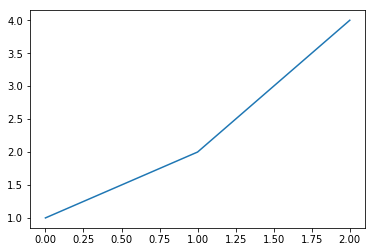

In [7]:
plt.plot([1,2,4])

# We have to tell matplotlib to "show" us the plot when we're finished
plt.show()

What I've done here is use the `plot` command to create a very simple line plot. We can see that the command has taken our list of values, `[1,2,4]` and used them to create the y-axis points, and automatically generated a list of x-axis values of `[0,1,2]`. 

But, this simple one-line command masks the fact that we've actually just generated a really complex heirarchy nested of Python objects, which can all be accessed and modified by us, the user. 

What this means is that each plot contains many different layers of objects, each of them linked in a tree-like pattern.

A basic representation of this object heirarchy can be seen below. In matplotlib, a `figure` actually represents the whole graphic. This graphic can have multiple subplots, and at this level we can do things like specify how large the want to overall image to be, the figure title, .

At the next level below that are the `axes`. We would typically think of these as the x-axis, or y-axis of a plot, but this is a misnomer. In matplotlib, the `axes` objects actually refer to each of the plots that exist within your overall figure. A single figure can have multiple different plots within it.



![Image Hierarchy](matplotlib.png)

Within your plot there are a bunch of different objects that can all be modified. This graphic below gives a basic overview of how to refer to each of these when looking for the relevant commands to modify them.

![Image Hierarchy](anatomy1.png)

Remember that we only can only ever manipulate **one** Figure or Axes object at a given time, and you don’t need to explicitly refer to it. If you have multiple subplots within your figure, then you will need to switch between different **axes** objects, or `ax`, to modify (or create) the different subplots in your figure.

## Matplotlib Plotting - how to create and access your Figure and Axes objects

To start, we need to create our figure and axes objects. This can be done with a simple command,   
`fig, ax = plt.subplots()`

As you might imagine, `subplots()` allows you specify how many different plots you want within your figure. As we didn't pass any arguments to `subplots()` here, the default call is `subplots(nrows=1, ncols=1)`. Consequently, ax is only a *single* AxesSubplot object:

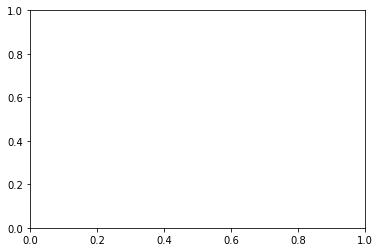

In [8]:
fig, ax = plt.subplots()

plt.show()

how do we put data on this graph? using plotting methods

```ax.plot()```

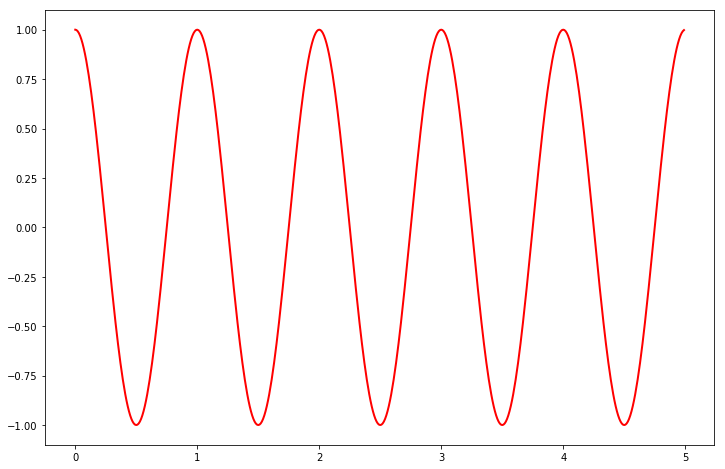

In [9]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

fig, ax = plt.subplots(figsize = (12,8))

#creating the plot of t (x) vs s (y). You can specify line colour and shape using commands
# such as "r" for red. lw = line width
ax.plot(t,s, color = "r", lw=2)

Note, there are a bunch of plotting methods that create different kinds of plots... more on that later

### How do I be a good scientist and label my plots?
*** There are methods for that too!!*** 
``` 
ax.set_xlabel() #gives you x axis labels
ax.set_ylabel() #give you y axis labels
ax.set_title() #lets you create a title
ax.legend() #tells matplotlib to make a legend
```
the list goes on:
https://matplotlib.org/api/axes_api.html#the-axes-class

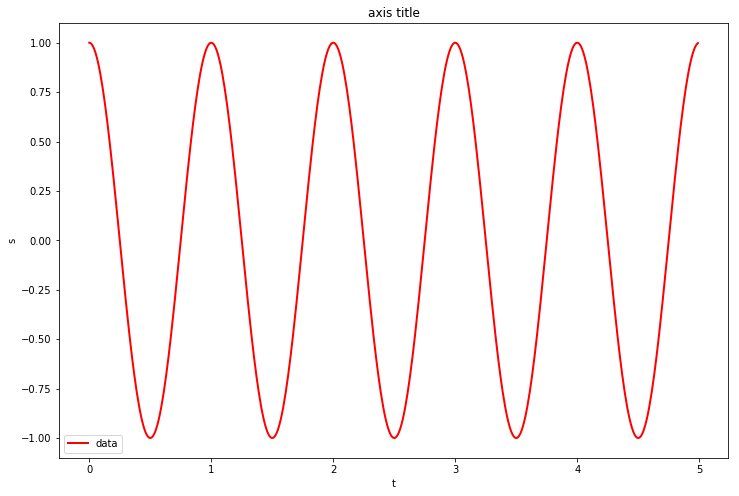

In [10]:
fig, ax = plt.subplots(figsize = (12,8))

#recreating the figure from above
ax.plot(t,s, color = "r", lw=2)

#here we are using methods to add things on
ax.set_xlabel('t')
ax.set_ylabel('s')
ax.set_title('axis title')
ax.legend(['data'])

#### what if I want multiple things?
You can run as many plotting methods as you want one  a given axis, and it will plot things on top of the previous data

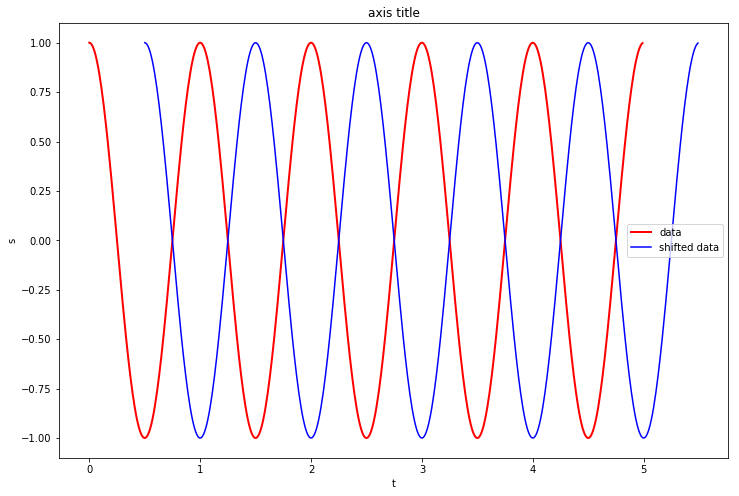

In [11]:
fig, ax = plt.subplots(figsize = (12,8))

#recreating the figure from above
ax.plot(t,s, color = "r", lw=2)

#we are now adding a second plot to the same axis

ax.plot(t+0.5,s,color='b')

#here we are using methods to add things on
ax.set_xlabel('t')
ax.set_ylabel('s')
ax.set_title('axis title')
ax.legend(['data','shifted data'])

###  Some other plotting methods Scatterplots

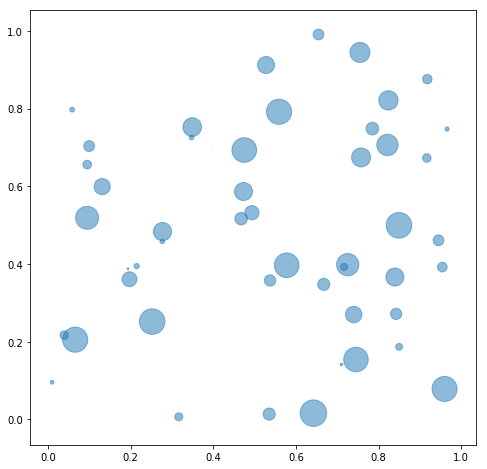

In [12]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
# Creating area for the marker size 
area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

fig,ax = plt.subplots(figsize = (8,8))

ax.scatter(x, y, s=area, alpha=0.5)
plt.show()

### There are too many plotting methods to teach, so lets learn how to figure one out:

Look up https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html#matplotlib.axes.Axes.errorbar
- plot t vs s, with a constant yerror bar of 0.1, and a constant x error bar of 0.2
- then use a sample varying yerror bar with the  provided

In [13]:
t = np.arange(0.0, 5.0, 0.1)
s = np.cos(2*np.pi*t)
constant_yerror = 0.1
constant_xerror = 0.2
Variable_yerror = s*0.15

In [14]:
# alright have a play

If we wanted to however, we could create multiple `axes` (_or plots_ - remember that! Axes = Plots) by simply giving `subplots` more arguments.

`fig, ax = plt.subplots(nrows = 1,ncols = 3)` would allow me to create a figure that contains a single row of plots, with 3 different plots in different columns.

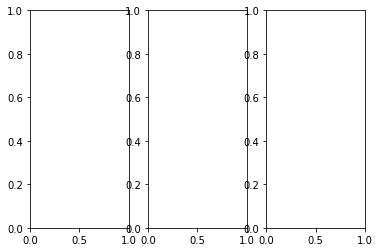

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3) #, figsize=(12, 5)) #Can also specify the size of the figure!

plt.show()

What this has done here is created a Figure object and a 1x3 NumPy array of `Axes` objects.

Let's illustrate how you can manipulate your different `axes` using a stacked area graph of three time series:

In [16]:
# Data
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

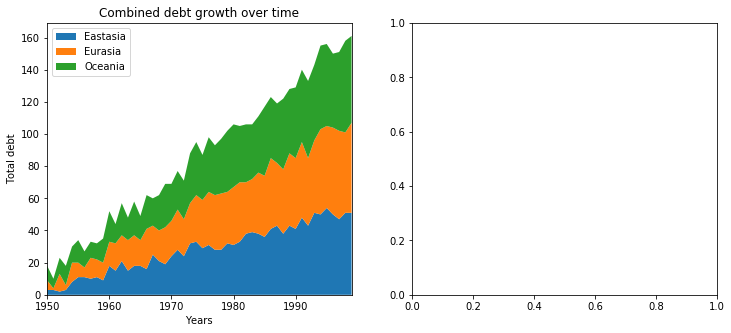

In [17]:
# Plotting
fig, (ax1, ax2)= plt.subplots(nrows = 1,ncols = 2, figsize=(12, 5)) #Can also specify the size of the figure!

# Make me a stacked area graph using yrs on the x-axis, rng + rnd as the Y-axis, 
# and label each stack with these names
ax1.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])

# Set the title of that plot
ax1.set_title('Combined debt growth over time')

# Create a legend, and tell it where to go
ax1.legend(loc='upper left')

# Set a label for the x- and y-axis
ax1.set_ylabel('Total debt')
ax1.set_xlabel('Years')

#Change the range of the x-axis so that there's no extra whitespace
ax1.set_xlim(xmin=yrs[0], xmax=yrs[-1])


plt.show()

Then, if I wanted to access the second Axes object to create a different graph, I can set the `ax` object to be my second plot using `ax = ax[1]`

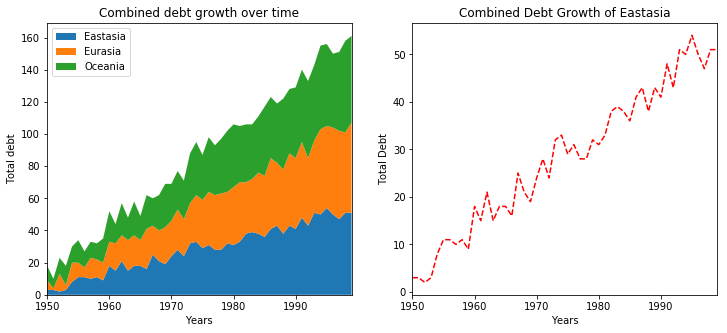

In [18]:
# Previous code for the left hand axis
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(12, 5))

ax1.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax1.set_title('Combined debt growth over time')
ax1.legend(loc='upper left')
ax1.set_ylabel('Total debt')
ax1.set_xlabel('Years')
ax1.set_xlim(xmin=yrs[0], xmax=yrs[-1])

# New code for the right hand axis
ax2.plot(yrs, rng + rnd[0], color = 'red', linewidth=1.5,ls = "--" )
ax2.set_title('Combined Debt Growth of Eastasia')
ax2.set_ylabel('Total Debt')
ax2.set_xlabel('Years')
ax2.set_xlim(xmin=yrs[0], xmax=yrs[-1])

plt.show()

<class 'numpy.ndarray'>


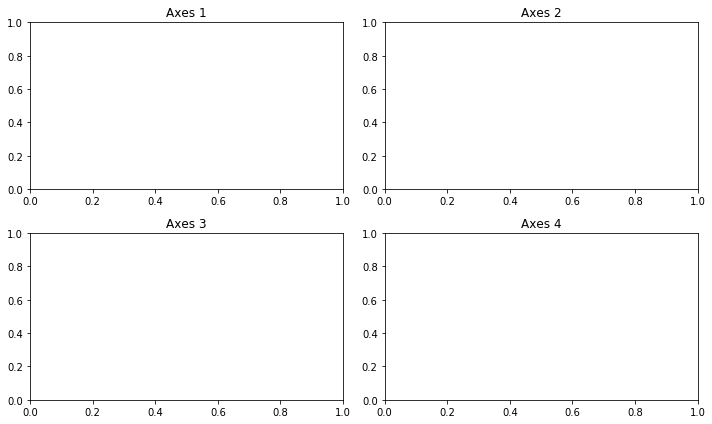

In [19]:
fig, ax = plt.subplots(nrows = 2,ncols = 2, figsize=(10, 6)) 
print(type(ax))# now we have a 2x2 numpy axes array
ax1, ax2, ax3, ax4 = ax.flatten() #flattening the 2D array into a 1D array that we can now use like before

ax1.set_title("Axes 1")
ax2.set_title("Axes 2")
ax3.set_title("Axes 3")
ax4.set_title("Axes 4")

fig.tight_layout() #fit the subplots into the figure area (12,5)

#plt.show()

..... that empty figure looks sad doesnt it? Lets fill it up with something
### Challenge 1: Plot the following random data in four different ways in the following subplots

In [23]:
# numpy has a pretty nice function to upload files

x = rando_data[1]
y = rando_data[10]
z= rando_data[15]

AttributeError: module 'numpy' has no attribute 'rando_data'

go to this website: https://matplotlib.org/api/axes_api.html#basic
and choose 4 different plot types, an see what they do, plot any of the four data sets above (not rando data is 2d, whereas X, Y, and Z are 1d arrays and the same length, so they can be plotted against each other
- add axis labels, and titles to each subplot
- extra credit if you can figure out how to share the x axes

<class 'numpy.ndarray'>


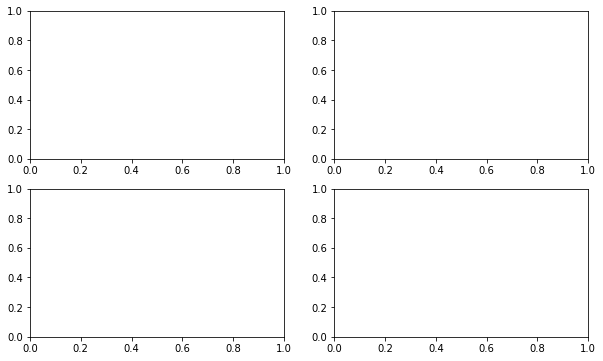

In [24]:
fig2, ax2 = plt.subplots(nrows = 2,ncols = 2, figsize=(10, 6)) 
print(type(ax))# now we have a 2x2 numpy axes array
ax1, ax2, ax3, ax4 = ax2.flatten() #flattening the 2D array into a 1D array that we can now use like before

In [25]:
#fill it up
#ax1.plot....

## Plotting and Visualisations (with Pandas!)

Pandas has it's own in-built plotting commands to interface with the the dataframe structures. This is because matplotlib is desgined to work with numpy arrays, so when passing it array-like structures, such as a series object (Pandas column) or a numpy nd-array, it can occassionally cause issues. 

To get around this, Pandas has added it's own wrapper to the matplotlib package. Essentially , Pandas plotting is matplotlib plotting, but with commands that are structured slightly differently, and cross-compatibility with dataframes. 

Most plotting methods have a set of keyword arguments that control the layout and formatting of the returned plot. For each kind of plot (e.g. line, bar, scatter) any additional arguments keywords are passed along to the corresponding matplotlib function (ax.plot(), ax.bar(), ax.scatter()). These can be used to control additional styling, beyond what pandas provides

So, let's get into some data:

In [26]:
df = pd.read_csv("Automobile_price_data_clean.csv")

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
df = pd.read_csv("Automobile_price_data_clean.csv", na_values= "?")

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [29]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,160.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,121.300000,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,35.602417,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,114.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,148.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [30]:
df.describe(include =  'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,160.000000,195,195,195,193,195,195,195,195.000000,...,195.000000,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,NaN,NaN,21,2,2,2,5,3,2,NaN,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,175,159,112,94,116,192,NaN,...,NaN,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.794872,121.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.896410,...,127.938462,NaN,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,35.602417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.132038,...,41.433916,NaN,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,148.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,145.500000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000


### The easiest way to plot with pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de84a90>]],
      dtype=object)

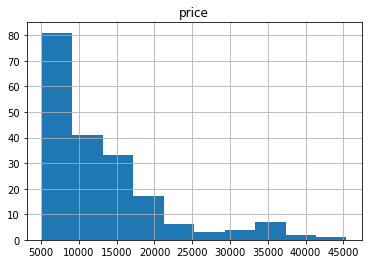

In [31]:
df.hist(column = 'price')

Quick and dirty, and automatically does some of the formatting for you, but like plt.plot() we don't have any way to customize the figure afterwards

[[<matplotlib.axes._subplots.AxesSubplot object at 0x10da85e48>]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10da85e48>]],
      dtype=object)

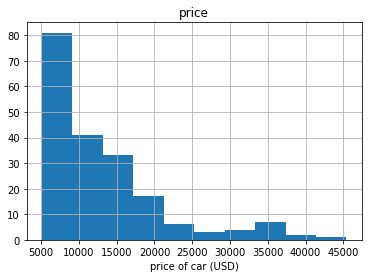

In [32]:
#Easy solution
hist_plot = df.hist(column = 'price')
print(hist_plot)

# It gives us a list of all the axes it created (1 in this instance) if we index them, we can manipulate the axes objects
hist_plot[0][0].set_xlabel('price of car (USD)')
hist_plot

**The more thorough way** - making a figure, and using the keyword argument ```ax=``` in the pandas plotting command to draw your graph onto tha figure

Text(0.5,0,'price of car (USD)')

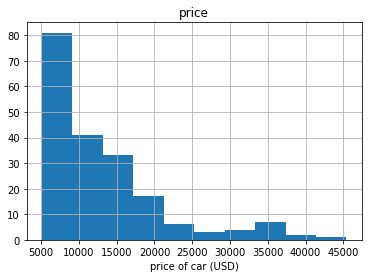

In [33]:
figh, axh = plt.subplots()

df.hist(column = 'price', ax = axh)

axh.set_xlabel('price of car (USD)')

### More Plotting! Univariate Data

Univariate data is where we have a single variable, or column. Plotting this data can take a few forms - boxplots, histograms, bar charts, and violin plots being the most common.

#### Boxplots


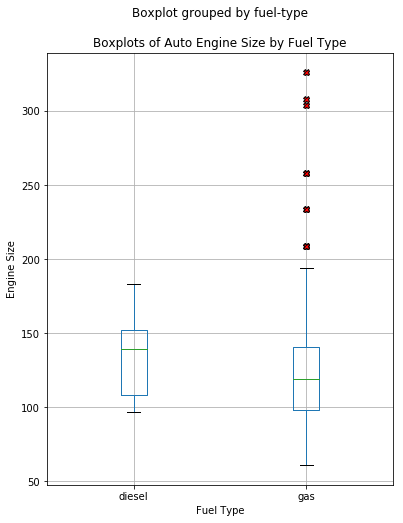

In [34]:
fig, ax = plt.subplots(figsize = (6,8))
outliers = dict(markerfacecolor='r', marker='X')


df[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax, flierprops= outliers)#, vert = False)

ax.set_title("Boxplots of Auto Engine Size by Fuel Type") #title
ax.set_xlabel("Fuel Type") #x-axis label
ax.set_ylabel("Engine Size") #y-axis label

plt.show()


### Barplots

As bar plots are for categorical data the first step is create counts for your data that you are actually able to plot

In [35]:
counts = df['make'].value_counts() #find the count for each unique category
counts

toyota           32
nissan           18
honda            13
mitsubishi       13
mazda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

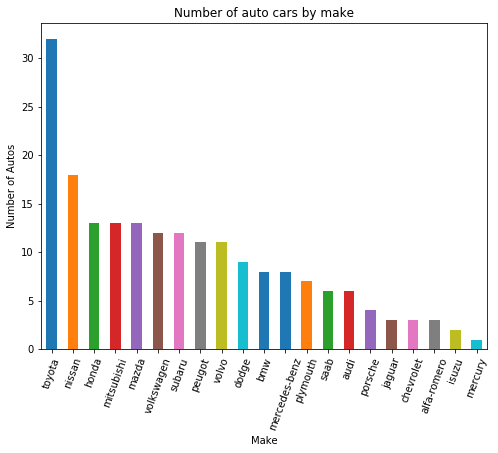

In [36]:
# Another way of creating your figure and axes objects
fig = plt.figure(figsize = (8,6))
ax = fig.gca() #defining axis

# Series.plot.bar - and on which axes we're plotting
counts.plot.bar(ax = ax)

ax.set_title("Number of auto cars by make") #title
ax.set_xlabel("Make") #x-axis label
ax.set_ylabel("Number of Autos") #y-axis label

plt.xticks(rotation=70)

plt.show()

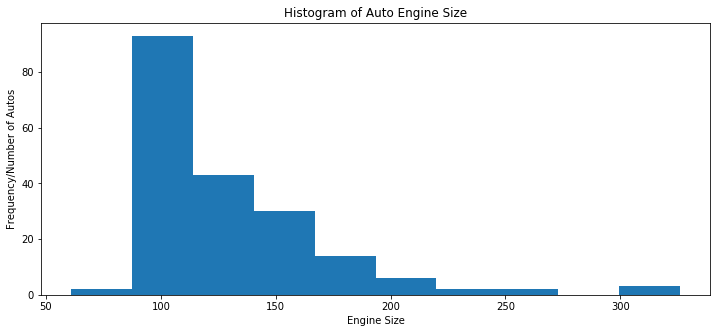

In [37]:
fig, ax = plt.subplots(figsize = (12,5))

df['engine-size'].plot.hist(ax = ax)#, bins = 30, alpha = 0.7)

ax.set_title("Histogram of Auto Engine Size") #title
ax.set_xlabel("Engine Size") #x-axis label
ax.set_ylabel("Frequency/Number of Autos") #y-axis label

plt.show()

### Bivariate data

Where you're plotting two variables against one another

### Line Plots

Plotting a line plots is as simple as using the `plot()` command on the back of whichever data you're trying to plot.

Text(0.5,0,'Car Models')

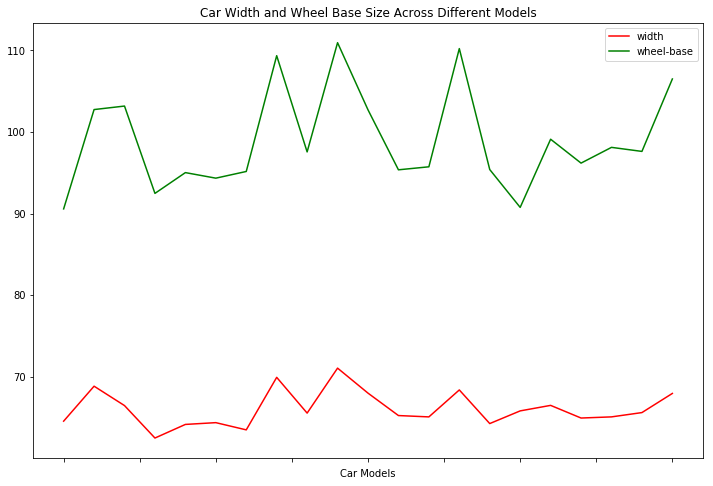

In [38]:
size = df[["width", "wheel-base","make"]].groupby(by = 'make').mean()

# Can specify the colours you want to be used (with US "color" spelling)
size.plot(figsize=(12, 8), color = ["red","green"]) # or use colormap if you have many labels

# Pandas can automatically create the figure and axes objects when you use the plot command
# To be able to access these to change various details though, you'll need to use the gca() and gcf() commands

# gcf = "get current figure"
fig = plt.gcf()
# gca = "get current axes"
ax = plt.gca()

ax.set_title("Car Width and Wheel Base Size Across Different Models")
ax.set_xlabel("Car Models")



In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


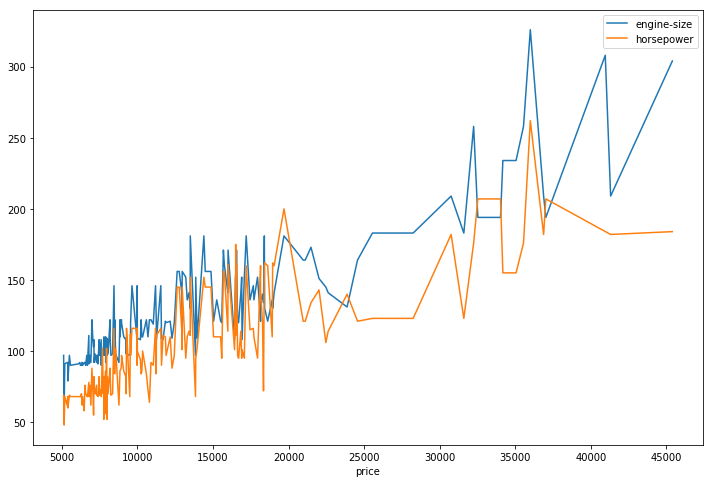

In [40]:
# Otherwise, you can use the original matplotlib commands to plot directly
cost = df[['price','engine-size','horsepower']].sort_values(by = 'price')

fig, ax = plt.subplots(figsize= (12,8))


cost.plot(x = 'price', y = "engine-size", ax = ax)
# Add another plot to the same plot
cost.plot(x = 'price', y = 'horsepower', ax = ax) # Still the same axes object as before

plt.show()

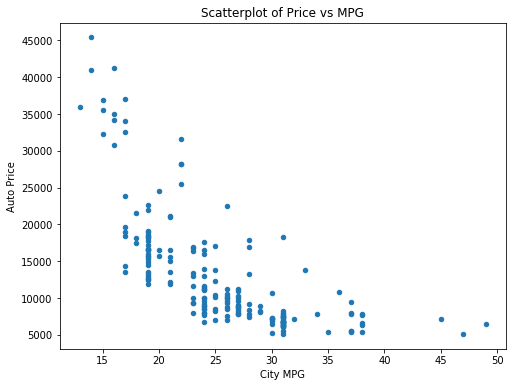

In [41]:
colx, coly = 'city-mpg', 'price'

fig = plt.figure(figsize = (8, 6))
ax = fig.gca() #defining axis

df.plot(kind = 'scatter', x = colx, y = coly, ax = ax) #, s = 50, marker = 'x')

ax.set_title("Scatterplot of Price vs MPG") #title
ax.set_xlabel("City MPG") #x-axis label
ax.set_ylabel("Auto Price") #y-axis label


# # Add correlation line - IFF IT'S A LINEAR RELATIONSHIP
# axes = plt.gca()
# m, b = np.polyfit(df[colx], df[coly], 1)
# X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
# plt.plot(X_plot, m*X_plot + b, '-')

plt.show()


### XKCD Style Plots - for a bit of fun

Source: https://matplotlib.org/users/screenshots.html#bar-charts

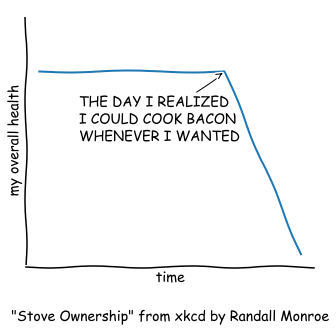

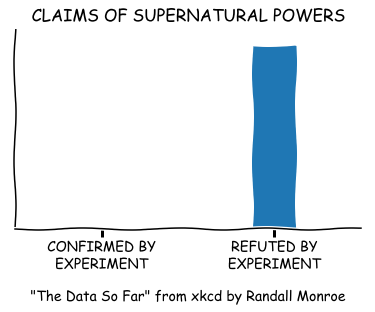

In [42]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure(facecolor=[1, 1, 1], figsize = (5,5))
    
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

        # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure(facecolor=[1, 1, 1] )
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, -0.05,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')
    
plt.show()



## Challenge

**Create your own, pretty plots with as many different customisations as you can find. You can find many of these on the MPL cheatsheets you've been given (and on the Github)

#### External Resources

**Tutorials**:
- https://realpython.com/python-matplotlib-guide/
- https://matplotlib.org/tutorials/introductory/pyplot.html
- https://matplotlib.org/tutorials/index.html
- https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python

**Documentation**
- [Matplotlib FAQ Page](https://matplotlib.org/faq/usage_faq.html)
- [User Guide](https://matplotlib.org/users/)
- [Pandas Visualisation Tools](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
- [Matplotlib Gallery](https://matplotlib.org/gallery.html)



### More Plotting examples

### Histograms with annotations

In [ ]:
#Creating random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

fig = plt.gcf()
ax = plt.gca()


ax.set_xlabel('Smarts')
ax.set_ylabel('Probability')
ax.set_title('Histogram of IQ')
ax.text(60, .025, r'$\mu=100,\ \sigma=15$')

ax.axis([40, 160, 0, 0.03]) #[xmin, xmax, ymin, ymax]
ax.grid(True)

plt.show()

In [ ]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

fig, ax = plt.subplots(figsize = (12,8))

#creating the plot of t (x) vs s (y). You can specify line colour and shape using commands
# such as "r" for red. lw = line width
ax.plot(t,s, color = "r", lw=2)

#adding an arrow to the plot
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

#adding plot text
plt.text(0.5, 1.2, r'y = $\cos(2\pi)$')

#y-axis
ax.set_ylim(-2,2)
ax.set_xlim(0,5)

plt.show()